# Exploring the Bitcoin Cryptocurrency Market

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 
plt.style.use('fivethirtyeight')

In [2]:
current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")
print(current.head())
print(current.dtypes)
print(current.isna().sum())

             id          name symbol  rank    price_usd  price_btc  \
0       bitcoin       Bitcoin    BTC     1  8149.658849   1.000000   
1      ethereum      Ethereum    ETH     2   176.421520   0.021671   
2        ripple           XRP    XRP     3     0.248496   0.000031   
3  bitcoin-cash  Bitcoin Cash    BCH     4   241.636427   0.029682   
4        tether        Tether   USDT     5     1.003418   0.000123   

   24h_volume_usd  market_cap_usd  available_supply  total_supply  \
0    2.308076e+10    147150745455          18056062      18056062   
1    8.112514e+09     19161491969         108611988     108611988   
2    1.479214e+09     10759829557       43299885509   99991280558   
3    2.312628e+09      4378757132          18121263      18121263   
4    2.586147e+10      4122085795        4108044456    4207771504   

     max_supply  percent_change_1h  percent_change_24h  percent_change_7d  \
0  2.100000e+07               0.07               -4.56              -7.09   
1         

In [3]:
dec6 = pd.read_csv("P:/recovery/pekan_projektit/Training/Datacamp_bitcoin/bitcoin.csv",
                  sep = ';')
market_cap_raw = dec6[['id', 'market_cap_usd']]
print(market_cap_raw['market_cap_usd'].count())

1031


In [4]:
cap = market_cap_raw.query('market_cap_usd > 0')
print(cap.count())
cap = market_cap_raw[market_cap_raw['market_cap_usd'] > 0]
print(cap.count())

id                1031
market_cap_usd    1031
dtype: int64
id                1031
market_cap_usd    1031
dtype: int64


In [5]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'
x=cap['id'].head(10)
#cap10 = cap.head(10)
#cap10.set_index('id')
cap10 = cap.head(10).set_index("id")
cap10['id'] = x
# Selecting the first 10 rows and setting the index
cap10 = cap10.assign(market_cap_perc = lambda x: 
                                      cap10.market_cap_usd / cap.market_cap_usd.sum()*100)

# Plotting


Text(0, 0.5, '% of total cap')

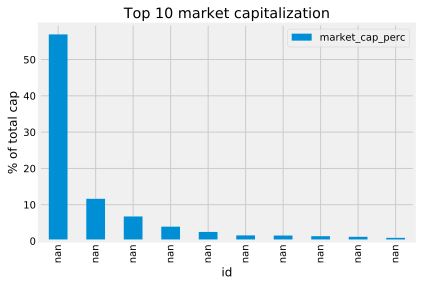

In [6]:
ax = cap10.plot.bar('id', 'market_cap_perc')
ax.set_title(TOP_CAP_TITLE)
ax.set_ylabel(TOP_CAP_YLABEL)

Text(0.5, 0, '')

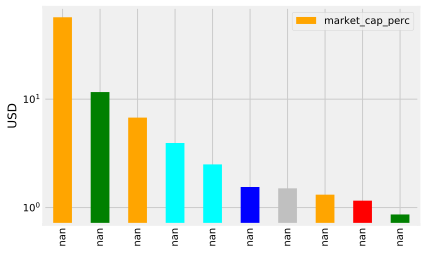

In [7]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
ax = cap10.plot.bar('id', 'market_cap_perc', color = COLORS)
# Annotating the y axis with 'USD'
ax.set_ylabel('USD')
ax.set_yscale('log')
# Final touch! Removing the xlabel as it is not very informative
ax.set_xlabel('')

In [8]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]
print(volatility.shape)
# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()
print(volatility.shape)
# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by = ['percent_change_24h'],  ascending = True)
# Checking the first few rows
volatility.head()

(1326, 3)
(1239, 2)


,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


# Functions

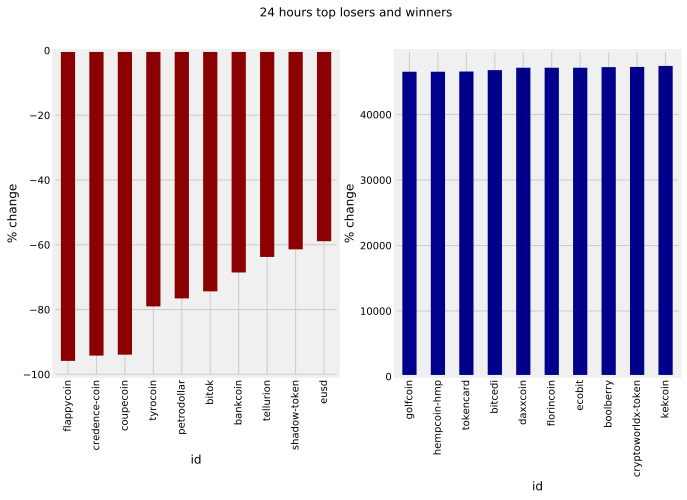

In [9]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[:10].plot.bar(color = 'darkred', ax=axes[0])
    # Setting the figure's main title to the text passed as parameter
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    ax.set_ylabel('% change')
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color = 'darkblue', ax=axes[1])
    ax.set_ylabel('% change')

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)



(<Figure size 720x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x185d6dbc6a0>)

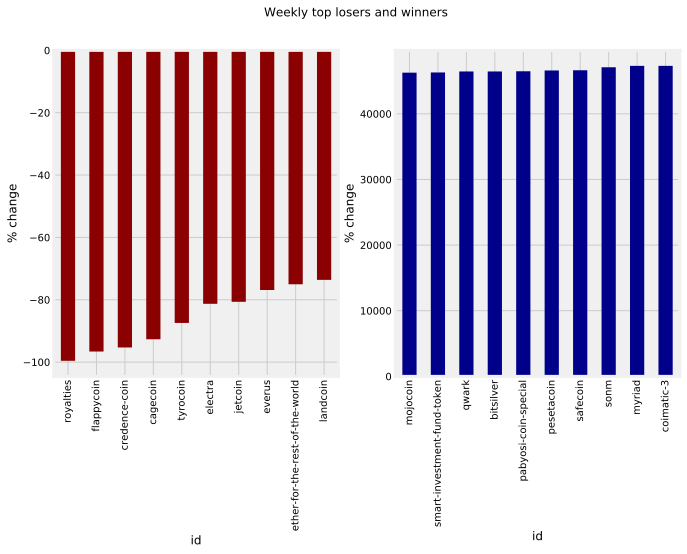

In [10]:
volatility7d = volatility.sort_values(by =['percent_change_7d'], ascending = True)
WTITLE = "Weekly top losers and winners"
top10_subplot(volatility7d.percent_change_7d, WTITLE) 

In [11]:
largecaps = cap.query('market_cap_usd > 10000000000')
print(largecaps)

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10


In [12]:
def capcount(query_string):
    return cap.query(query_string).count().id
LABELS = ["biggish", "micro", "nano"]

In [13]:
# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd >= 300000000')
micro = capcount('market_cap_usd < 300000000 and market_cap_usd > 50000000')
nano = capcount('market_cap_usd < 50000000')
values = [biggish, micro, nano]
mynames = ['biggish', 'micro', 'nano']

<BarContainer object of 3 artists>

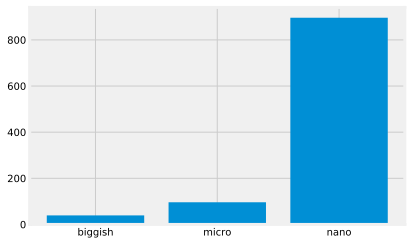

In [14]:
plt.bar(mynames, values)